# Capstone Webscrapping using BeautifulSoup

Created by :Rizky Citra Ramadhan



## Background

www.imdb.com adalah sebuah website yang beisi review dan penilaian film-film dari seluruh dunia, disini akan dilakukan penarikan data atau scrapping untuk 50 film popular yang rilis pada tahun 2021 yang diambil dari link berikut https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31. Data-data yang akan ditarik ini berupa nama judul film, nilai rating IMDb setiap film, nilai dari metascore film, dan banyaknya vote yang didapatkan masing-masing film. Akhirnya data tersebut akan ditampilkan dalam chart yang akan menunjukan 7 film dengan peringkat teratas berdasarkan popularitas yang telah diurutkan pada WEB tetapi disini juga akan dilakukan pengurutan berdasarkan besarnya nilai rating IMDb setiap film, nilai dari metascore film, dan banyaknya vote setiap film.



### Requesting the Data and Creating a BeautifulSoup

In [16]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

In [17]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n      '

In [18]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

### Scrap the data & Extracting the right information

In [19]:
table = soup.find('div', attrs={'class':'lister-list'})
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8179402">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt8179402/">
    <img alt="Fate: The Winx Saga" class="loadlate" data-tconst="tt8179402" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMzEyYzBhODYtZjZlOC00MTM4LWIxMjQtMTRhZjA5ODM4ZWI2XkEyXkFqcGdeQXVyODQwODA1MjY@._V1_UY98_CR5


##### The Code to Scrap the Film Title Data

In [20]:
judul = table.find_all('h3', attrs={'class':'lister-item-header'}) 
judul[0].find('a').text

'Fate: The Winx Saga'

In [21]:
rating = table.find_all('div', attrs={'class':'ratings-bar'})
rating[0]

<div class="ratings-bar">
<div class="inline-block ratings-imdb-rating" data-value="6.9" name="ir">
<span class="global-sprite rating-star imdb-rating"></span>
<strong>6.9</strong>
</div>
<div class="inline-block ratings-user-rating">
<span class="userRatingValue" data-tconst="tt8179402" id="urv_tt8179402">
<span class="global-sprite rating-star no-rating"></span>
<span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
</span>
<div class="starBarWidget" id="sb_tt8179402">
<div class="rating rating-list" data-csrf-token="" data-ga-identifier="" data-starbar-class="rating-list" data-user="" id="tt8179402|imdb|6.9|6.9|adv_li_tt||advsearch|title" itemprop="aggregateRating" itemscope="" itemtype="http://schema.org/AggregateRating" title="Users rated this 6.9/10 (45,246 votes) - click stars to rate">
<meta content="6.9" itemprop="ratingValue"/>
<meta content="10" itemprop="bestRating"/>
<meta content="45246" itemprop="ratingCount"/>
<span class="rating-bg"> </

##### The Code to Scrap the Film IMBD Rating Data

In [36]:
rating[0].find('meta', attrs={'itemprop':'ratingValue'})['content']

'6.9'

##### The Code to Scrap the Film Vote Data

In [101]:
rating[0].find('meta', attrs={'itemprop':'ratingCount'})['content']

'45246'

##### The Code to Scrap the Film MetaScore Data

In [103]:
rating[6].find_all('span', attrs={'class':'metascore favorable'})[0].text.strip()

'65'

##### The Length of Row

In [39]:
row = table.find_all('h3', attrs={'class':'lister-item-header'})
row_length = len(row)
row_length

50

#### Scrapping  All The Data
Disini akan dilakukan scrapping seluruh data yang telah dicoba codenya diatas, khusus untuk data metascore karena tidak seluruh film memiliki nilai metascsore maka data yang kosong diubah menjadi nilai Nol(0)

In [40]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    Title = judul[i].find('a').text
    IMDB_Rating = rating[i].find('meta', attrs={'itemprop':'ratingValue'})['content']
    Vote = rating[i].find('meta', attrs={'itemprop':'ratingCount'})['content']
    MetaScore = rating[i].find_all('span', attrs={'class':'metascore favorable'})
    if len(MetaScore) > 0:
        MetaScore = rating[i].find_all('span', attrs={'class':'metascore favorable'})[0].text.strip()
    else:
        MetaScore = "0"

        
    temp.append((Title,IMDB_Rating,MetaScore,Vote))
temp

[('Fate: The Winx Saga', '6.9', '0', '45246'),
 ('The White Lotus', '7.6', '0', '68494'),
 ('Only Murders in the Building', '8.1', '0', '97011'),
 ('Abbott Elementary', '8.2', '0', '14141'),
 ('La Brea', '5.7', '0', '10402'),
 ('Resident Alien', '8.1', '0', '39457'),
 ('The Black Phone', '7', '65', '115155'),
 ('Reservation Dogs', '8.1', '0', '14830'),
 ('Snabba cash', '7.6', '0', '9519'),
 ('Ghosts', '7.8', '0', '14924'),
 ('1883', '8.8', '0', '63482'),
 ('American Horror Stories', '6.2', '0', '20911'),
 ('Spider-Man: No Way Home', '8.3', '71', '731957'),
 ('Mare of Easttown', '8.4', '0', '152505'),
 ('Dune: Part One', '8', '74', '615652'),
 ('The Mighty Ducks: Game Changers', '7.4', '0', '4834'),
 ('Licorice Pizza', '7.2', '90', '106398'),
 ('Shadow and Bone', '7.6', '0', '83183'),
 ('Law & Order: Organized Crime', '7.7', '0', '7129'),
 ('Sing 2', '7.4', '0', '66022'),
 ('Nine Perfect Strangers', '7', '0', '49247'),
 ('No Time to Die', '7.3', '68', '390881'),
 ('Arcane: League of Leg

### Creating data frame & Data wrangling

In [47]:
import pandas as pd

Data_Film = pd.DataFrame(temp, columns = ('Title','IMDB_Rating','MetaScore','Vote'))
Data_Film.head()

,Title,IMDB_Rating,MetaScore,Vote
0,Fate: The Winx Saga,6.9,0,45246
1,The White Lotus,7.6,0,68494
2,Only Murders in the Building,8.1,0,97011
3,Abbott Elementary,8.2,0,14141
4,La Brea,5.7,0,10402


In [48]:
Data_Film.dtypes

Title          object
IMDB_Rating    object
MetaScore      object
Vote           object
dtype: object

In [49]:
Data_Film[['IMDB_Rating','MetaScore']] = Data_Film[['IMDB_Rating','MetaScore']].astype('float64')
Data_Film['Vote'] = Data_Film['Vote'].astype('int64')
Data_Film.dtypes

Title           object
IMDB_Rating    float64
MetaScore      float64
Vote             int64
dtype: object

##### Pengurutan Berdasarkan Popularitas Dari WEB

In [83]:
Data_Popularitas= Data_Film.drop(['Vote'], axis = 1).head(7).set_index('Title')
Data_Popularitas

,IMDB_Rating,MetaScore
Title,,
Fate: The Winx Saga,6.9,0.0
The White Lotus,7.6,0.0
Only Murders in the Building,8.1,0.0
Abbott Elementary,8.2,0.0
La Brea,5.7,0.0
Resident Alien,8.1,0.0
The Black Phone,7.0,65.0


##### Pengurutan Berdasarkan IMDB Rating

In [51]:
Data_Rating= Data_Film.sort_values(by= 'IMDB_Rating', ascending=False).set_index('Title')
Data_Rating[['IMDB_Rating']].head(7)

,IMDB_Rating
Title,
Arcane: League of Legends,9.0
1883,8.8
Dopesick,8.6
Mare of Easttown,8.4
Spider-Man: No Way Home,8.3
Hacks,8.2
Abbott Elementary,8.2


##### Pengurutan Berdasarkan MetaScore

In [52]:
Data_Score= Data_Film.sort_values(by= 'MetaScore', ascending=False).set_index('Title')
Data_Score[['MetaScore']].head(7)

,MetaScore
Title,
Licorice Pizza,90.0
Pleasure,75.0
Dune: Part One,74.0
Spider-Man: No Way Home,71.0
Gekijouban Jujutsu Kaisen 0,71.0
No Time to Die,68.0
Last Night in Soho,65.0


##### Pengurutan Berdasarkan Vote

In [53]:
Data_Vote= Data_Film.sort_values(by= 'Vote', ascending=False).set_index('Title')
Data_Vote[['Vote']].head(7)

,Vote
Title,
Spider-Man: No Way Home,731957
Dune: Part One,615652
Don't Look Up,527099
Ojing-eo geim,436653
No Time to Die,390881
Free Guy,361749
Eternals,333997


### Data visualisation
Seluruh data yang telah diurutkan di atas akan divisualisasikan dalam sebuah bar plot

#####  Plot Popularitas Dari WEB

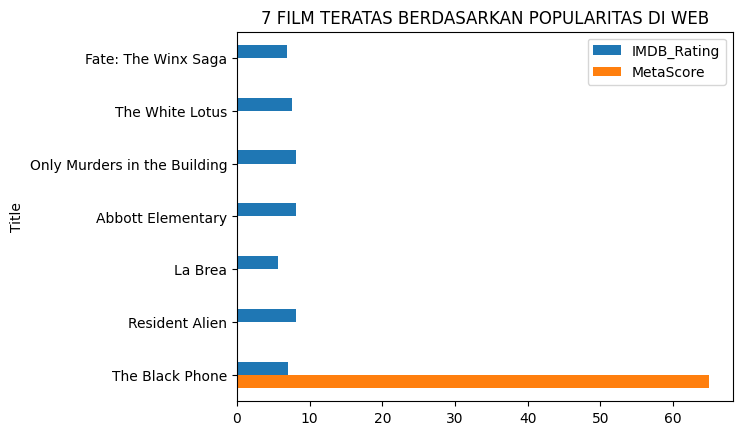

In [100]:
Data_Popularitas.set_index('Title').plot.barh(title = '7 FILM TERATAS BERDASARKAN POPULARITAS DI WEB').invert_yaxis()

#####  Plot IMDB Rating

<AxesSubplot:title={'center':'7 FILM TERATAS BERDASARKAN IMDB RATING'}, ylabel='Title'>

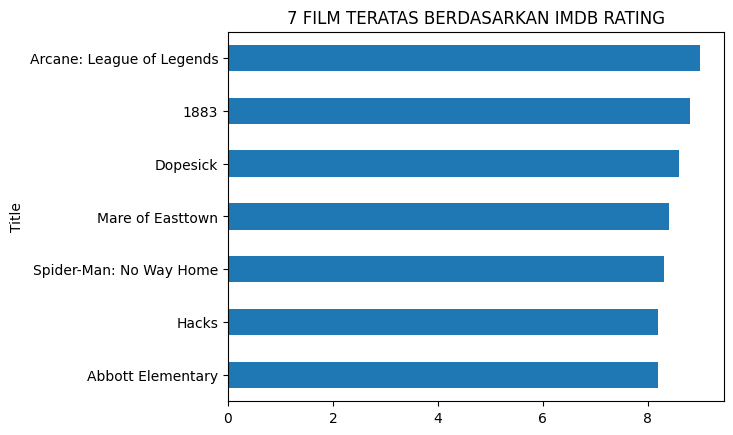

In [54]:
D_Rating = Data_Film.sort_values(by= 'IMDB_Rating', ascending=True).set_index('Title')
D_Rating['IMDB_Rating'].tail(7).plot.barh(title = '7 FILM TERATAS BERDASARKAN IMDB RATING')

#####  Plot MetaScore

<AxesSubplot:title={'center':'7 FILM TERATAS BERDASARKAN METASCORE'}, ylabel='Title'>

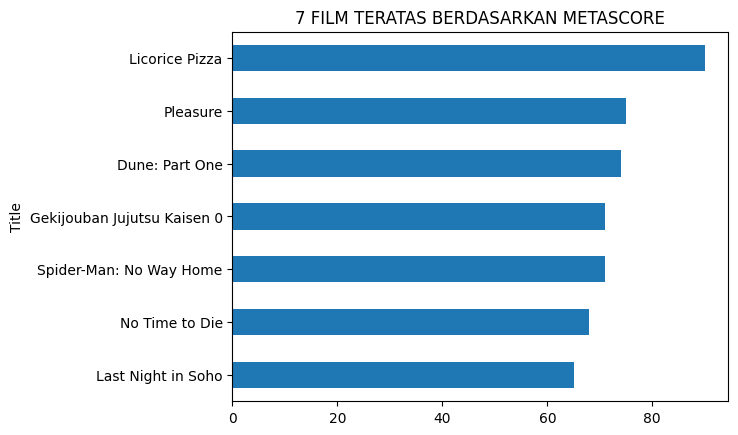

In [55]:
D_Score= Data_Film.sort_values(by= 'MetaScore', ascending=True).set_index('Title')
D_Score['MetaScore'].tail(7).plot.barh(title = '7 FILM TERATAS BERDASARKAN METASCORE')

#####  Plot Vote

<AxesSubplot:title={'center':'7 FILM TERATAS BERDASARKAN BANYAK VOTE'}, ylabel='Title'>

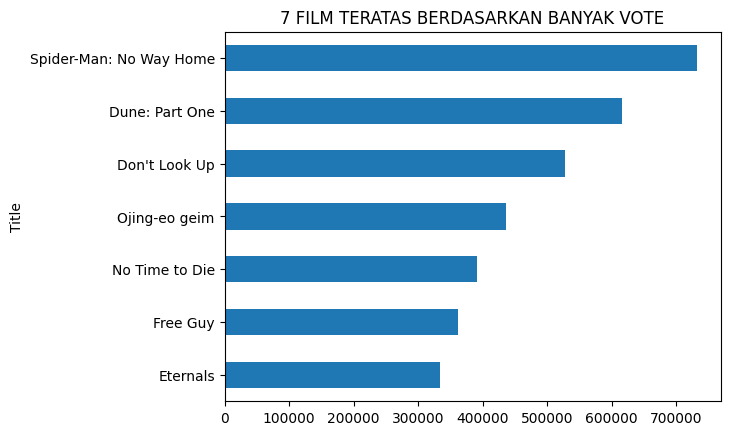

In [56]:
# Berdasarkan Vote
D_Vote= Data_Film.sort_values(by= 'Vote', ascending=True).set_index('Title')
D_Vote['Vote'].tail(7).plot.barh(title = '7 FILM TERATAS BERDASARKAN BANYAK VOTE')

## Analysis and Conclusion


Berdasarkan seluruh chart yang telah ditampilkan dapat ditarik kesimpulan bahwa setiap tipe (Popularitas, IMDB Rating, MetaScore, dan Vote) memiliki hasil yang berbeda dan tidak semua film memiliki MetaScore. Besaran data yang dimiliki oleh setiap tipe ini juga berbeda dimana Data pada IMDB Rating memiliki nilai satuan, pada MetaScore memiliki nilai puluhan, dan pada Vote sangat berbeda jauh yaitu memiliki nilai ratusan ribu. Hal-hal ini menyebabkan data ketiga tipe tersebut tidak bisa ditampilkan dalam satu plot. Seperti pada tipe Popularitas yang hanya dapat ditampilkan nilai IMDB Rating dan MetaScore saja, juga film yang memiliki nilai MetasSore pada tipe Popularitas ini hanya film dengan judul **The Black Phone**. Dari keseluruhan film **Spider-Man: No Way Home** selain sebagai film dengan Vote tertinggi tetapi juga selalu muncul pada setiap tipe, dapat disimpulkan bahwa film **Spider-Man: No Way Home** adalah film yang sangat diminati, walau sangat disayangkan film ini tidak termasuk 7 film populer berdasarkan pengurutan Popularitas di WEB www.imdb.com.